#ALUMNO: SEBASTIAN ARIEL MERAGELMAN
32561804

Subir a repositorio de Github, con al menos un pull request, y devolver el link
1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema se intenta resolver.

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.

Inicio de descarga y preparacion del archivo del dataset 
Contiene información del indice de variacion de precio al consumidor porcentual (IPC) mensual 

In [ ]:

!pip install xlrd --upgrade

In [112]:
import pandas as pd
import requests
import openpyxl

url = "https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_11_22.xls"


resp = requests.get(url)
with open('indec.xls', 'wb') as output:
    output.write(resp.content)

pd_indec= pd.read_excel("indec.xls")


In [113]:
pd_indec=pd_indec.dropna()

In [114]:
pd_indec.columns = pd_indec.iloc[0]
pd_indec.columns = [str(i)[0:7] for i in pd_indec.columns]
pd_indec = pd_indec[2:14]

In [60]:
pd_indec = pd_indec.T
pd_indec.columns = pd_indec.iloc[0]
pd_indec=pd_indec[1:]

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 2017-01 to 2022-10
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Alimentos y bebidas no alcohólicas                      70 non-null     object
 1   Bebidas alcohólicas y tabaco                            70 non-null     object
 2   Prendas de vestir y calzado                             70 non-null     object
 3   Vivienda, agua, electricidad, gas y otros combustibles  70 non-null     object
 4   Equipamiento y mantenimiento del hogar                  70 non-null     object
 5   Salud                                                   70 non-null     object
 6   Transporte                                              70 non-null     object
 7   Comunicación                                            70 non-null     object
 8   Recreación y cultura                          

In [75]:
for i in pd_indec.columns:
  pd_indec[i] = pd_indec[i].astype(float)

pd_indec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 2017-01 to 2022-10
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Alimentos y bebidas no alcohólicas                      70 non-null     float64
 1   Bebidas alcohólicas y tabaco                            70 non-null     float64
 2   Prendas de vestir y calzado                             70 non-null     float64
 3   Vivienda, agua, electricidad, gas y otros combustibles  70 non-null     float64
 4   Equipamiento y mantenimiento del hogar                  70 non-null     float64
 5   Salud                                                   70 non-null     float64
 6   Transporte                                              70 non-null     float64
 7   Comunicación                                            70 non-null     float64
 8   Recreación y cultura                

Buscamos analizar la variacion de precios para predecir cual podria ser la variacion los meses siguientes en funcion de una variable predictora que sera el costo del TRANSPORTE

In [63]:
# Tratamiento de datos
# ==============================================================================
from sklearn import datasets
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Analisis de Correlacion

In [81]:
corr_matrix = pd_indec.corr()
corr_matrix

Total n,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Vivienda, agua, electricidad, gas y otros combustibles",Equipamiento y mantenimiento del hogar,Salud,Transporte,Comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios varios
Total n,,,,,,,,,,,,
Alimentos y bebidas no alcohólicas,1.000000,0.590676,0.550092,0.147106,0.548959,0.513975,0.700773,0.192562,0.509713,0.317389,0.700329,0.766007
Bebidas alcohólicas y tabaco,0.590676,1.000000,0.575884,0.058013,0.513641,0.492310,0.473503,0.179703,0.506793,0.282283,0.580147,0.577351
Prendas de vestir y calzado,0.550092,0.575884,1.000000,0.101000,0.628287,0.439275,0.510271,-0.041349,0.462627,0.451236,0.519140,0.557633
"Vivienda, agua, electricidad, gas y otros combustibles",0.147106,0.058013,0.101000,1.000000,0.136665,0.266852,0.265786,0.126413,-0.039952,0.072862,0.166207,0.225085
Equipamiento y mantenimiento del hogar,0.548959,0.513641,0.628287,0.136665,1.000000,0.630471,0.662011,0.059593,0.593887,0.103331,0.625928,0.738489
Salud,0.513975,0.492310,0.439275,0.266852,0.630471,1.000000,0.578703,0.261518,0.501322,0.123821,0.560319,0.692234
Transporte,0.700773,0.473503,0.510271,0.265786,0.662011,0.578703,1.000000,0.094257,0.437679,0.090204,0.607369,0.700809
Comunicación,0.192562,0.179703,-0.041349,0.126413,0.059593,0.261518,0.094257,1.000000,0.137604,0.111865,0.229435,0.242555
Recreación y cultura,0.509713,0.506793,0.462627,-0.039952,0.593887,0.501322,0.437679,0.137604,1.000000,0.075960,0.724482,0.649505


SE GRAFICA LA CORRELACION

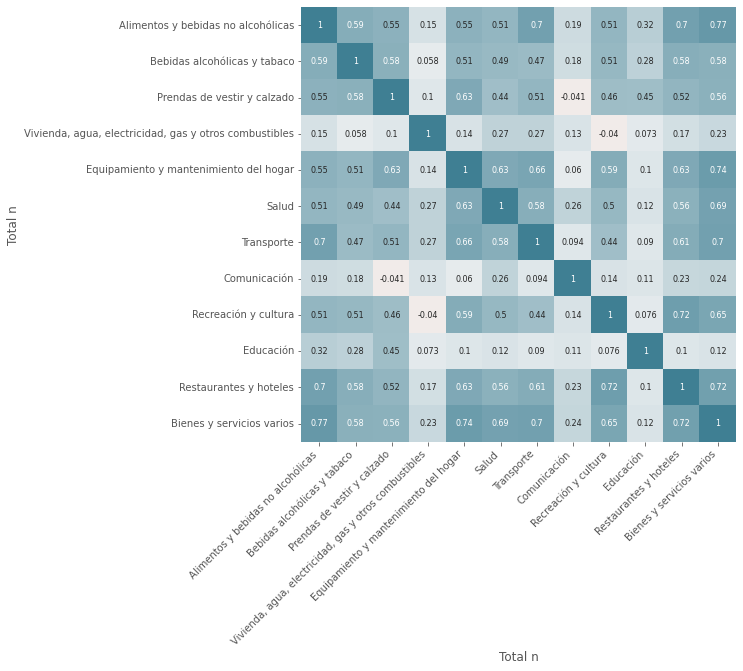

In [80]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Graficamos la distribucion de las variables segun los aumentos

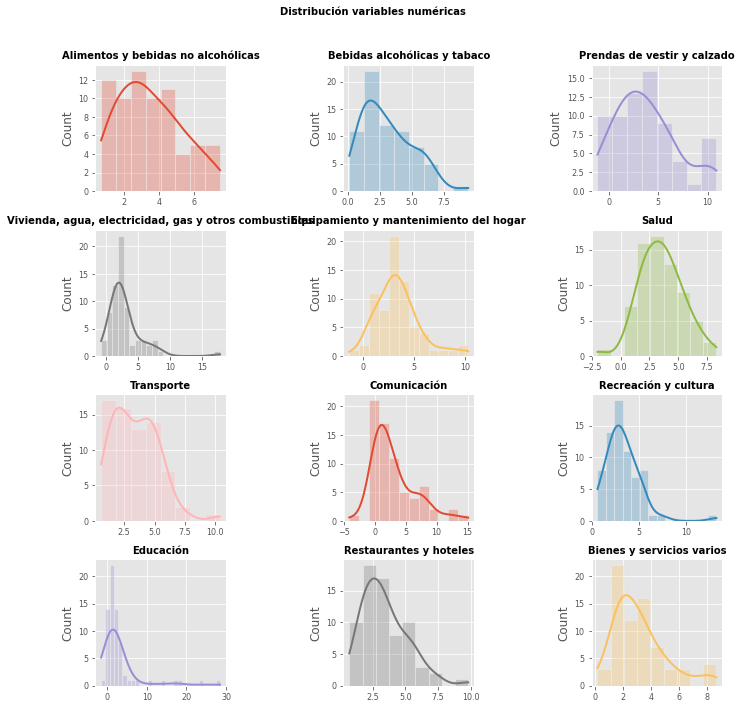

In [85]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_numeric = pd_indec.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = pd_indec,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

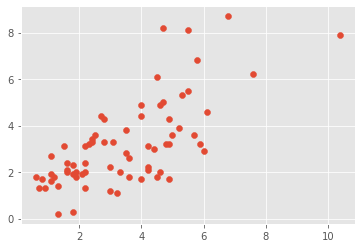

In [86]:
# Comparamos si encontramos una dependencia entre el incremento del transporte y el de Bienes y servicios varios
plt.scatter(pd_indec['Transporte'],pd_indec['Bienes y servicios varios'])

In [87]:
pd_indec.columns

Index(['Alimentos y bebidas no alcohólicas', 'Bebidas alcohólicas y tabaco',
       'Prendas de vestir y calzado',
       'Vivienda, agua, electricidad, gas y otros combustibles',
       'Equipamiento y mantenimiento del hogar', 'Salud', 'Transporte',
       'Comunicación', 'Recreación y cultura', 'Educación',
       'Restaurantes y hoteles', 'Bienes y servicios varios'],
      dtype='object', name='Total n')

In [89]:
# División de los datos en train y test
# ==============================================================================
# Las variables pueden funcionar como predictores u variables objetos

X = pd_indec[['Alimentos y bebidas no alcohólicas']]
y = pd_indec['Transporte']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X = pd_indec[['Equipamiento y mantenimiento del hogar']]
y = pd_indec['Transporte']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X = pd_indec[['Bienes y servicios varios']]
y = pd_indec['Transporte']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X = pd_indec[['Prendas de vestir y calzado']]
y = pd_indec['Transporte']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [90]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     13.09
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           0.000654
Time:                        15:08:46   Log-Likelihood:                -103.10
No. Observations:                  56   AIC:                             210.2
Df Residuals:                      54   BIC:                             214.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5074      0.331      7.580      0.0

In [91]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

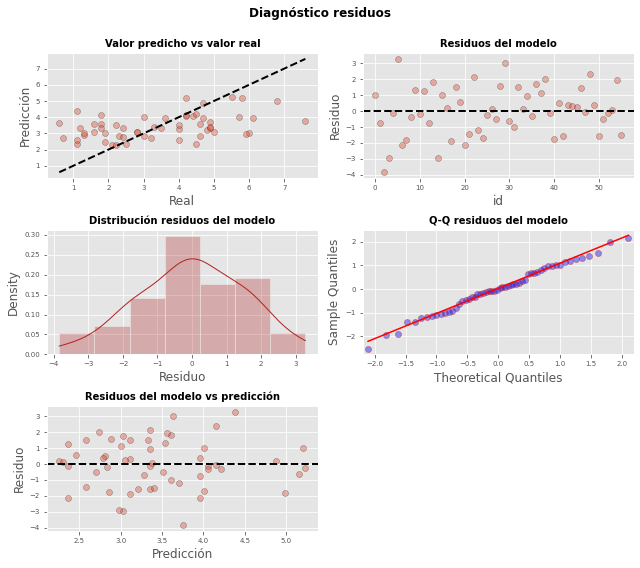

In [92]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

#BUSCAMOS OTRO ENFOQUE DESDE UN ARBOL DE DESICION

In [93]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [95]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(pd_indec.drop(columns='Transporte'),pd_indec['Transporte'],random_state = 125)
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 125
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=125)

Profundidad del árbol: 3
Número de nodos terminales: 7


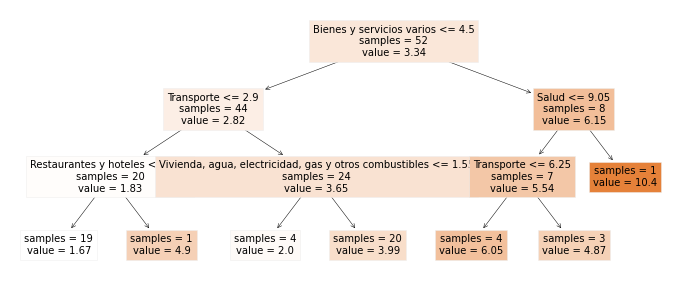

In [100]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = pd_indec.drop(columns = "Prendas de vestir y calzado").columns,
            class_names   = 'Prendas de vestir y calzado',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [101]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(pd_indec.drop(columns = "Prendas de vestir y calzado").columns)
               )
print(texto_modelo)

|--- Bienes y servicios varios <= 4.50
|   |--- Transporte <= 2.90
|   |   |--- Restaurantes y hoteles <= 5.45
|   |   |   |--- value: [1.67]
|   |   |--- Restaurantes y hoteles >  5.45
|   |   |   |--- value: [4.90]
|   |--- Transporte >  2.90
|   |   |--- Vivienda, agua, electricidad, gas y otros combustibles <= 1.55
|   |   |   |--- value: [2.00]
|   |   |--- Vivienda, agua, electricidad, gas y otros combustibles >  1.55
|   |   |   |--- value: [3.99]
|--- Bienes y servicios varios >  4.50
|   |--- Salud <= 9.05
|   |   |--- Transporte <= 6.25
|   |   |   |--- value: [6.05]
|   |   |--- Transporte >  6.25
|   |   |   |--- value: [4.87]
|   |--- Salud >  9.05
|   |   |--- value: [10.40]



In [102]:
importancia_predictores = pd.DataFrame(
                            {'predictor': pd_indec.drop(columns = "Prendas de vestir y calzado").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
10,Bienes y servicios varios,0.475956
5,Transporte,0.246134
4,Salud,0.131285
2,"Vivienda, agua, electricidad, gas y otros comb...",0.083530
9,Restaurantes y hoteles,0.063095
0,Alimentos y bebidas no alcohólicas,0.000000
1,Bebidas alcohólicas y tabaco,0.000000
3,Equipamiento y mantenimiento del hogar,0.000000
6,Comunicación,0.000000
7,Recreación y cultura,0.000000


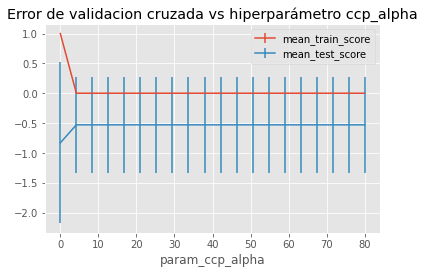

In [103]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [104]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

Profundidad del árbol: 0
Número de nodos terminales: 1


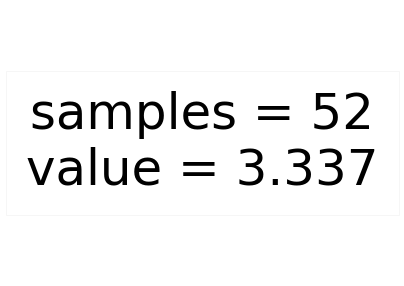

In [106]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = pd_indec.drop(columns = "Prendas de vestir y calzado").columns,
            class_names   = 'Prendas de vestir y calzado',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [107]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 2.004297049631445


In [108]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.7601262627666798


Si bien encontramos una relacion entre las variables no es posible dar una buena prediccion entre las variables Transporte y las otras variables del dataset